# 1. Instalación e imports

In [1]:
#True si se ejecuta en la pc con cpu, False si es en colab
is_pc = True

#True si se desea entrenar los modelos, False si solo se van a cargar los pesos
is_trainable = False

#True crea la arquitectura de los modelos, False si se desea cargar la arquitectura desde un json
crear_arquitectura = False

#True si se desean guardar imagenes de las arquitecturas de los modelos
plot_models_arquitecture = False

#True si se desean guardar en un archivo el modelo completo
guardar_modelos_full = False

#True si se desean guardar en un archivo json la configuracion de los modelos creados
guardar_config_modelos = False

#True si se desean guardar en un archivo con los pesos de los modelos entrenados
guardar_pesos = False

In [2]:
if(not is_pc):
    !pip install transformers
    !pip install Unidecode
    !pip install nlpaug
    !pip install googletrans-py

In [3]:
import os
cwd = os.getcwd()

if is_pc:
    ruta_modelos = cwd + '\\modelos_guardados\\FinancialPhraseBank\\'
    os.environ["OMP_NUM_THREADS"] = "1" 
else:
    from google.colab import drive
    drive.mount('/content/gdrive')
    ruta_modelos = 'gdrive//MyDrive//modelos_guardados//FinancialPhraseBank//'

In [4]:
import pandas as pd
import numpy as np
import random
from collections import Counter
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
import nlpaug
#import googletrans
#from googletrans import Translator

import matplotlib.pyplot as plt

In [5]:
#import googletrans

In [6]:
import Preprocesamiento as pp
import Modelos as mo
import Data_Augmentation as da

[nltk_data] Downloading package stopwords to
[nltk_data]     c:\Users\starl\Downloads\Proyectos Data
[nltk_data]     Science\proyecto capstone\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     c:\Users\starl\Downloads\Proyectos Data
[nltk_data]     Science\proyecto capstone\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     c:\Users\starl\Downloads\Proyectos Data
[nltk_data]     Science\proyecto capstone\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
c:\Users\starl\anaconda3\envs\env_pruebas\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 2. Entendimiento y Limpieza de Datasets

In [7]:
df_columns=['title', 'sentiment']
df_raw = pd.read_csv("datasets/all-data.csv", delimiter=',', encoding='latin-1', header=None)
df_raw = df_raw.loc[:,::-1]
df_raw.columns=df_columns
df_raw.head()

,title,sentiment
0,"According to Gran , the company has no plans t...",neutral
1,Technopolis plans to develop in stages an area...,neutral
2,The international electronic industry company ...,negative
3,With the new production plant the company woul...,positive
4,According to the company 's updated strategy f...,positive


In [8]:
df_raw.dropna(inplace=True)
df_raw.drop_duplicates(inplace=True)

In [9]:
df_raw.sentiment.value_counts()

sentiment
neutral     2873
positive    1363
negative     604
Name: count, dtype: int64

In [10]:
cat_names = ['negative', 'neutral', 'positive']
cat_values = [0, 1, 2]

In [11]:
n_cat=df_raw.sentiment.nunique()
n_cat

3

# Preprocesamiento

In [12]:
df=df_raw.copy()

In [13]:
df['title'][0]

'According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .'

In [14]:
df = pp.limpieza_df(df, "title")
df.head()

,title,sentiment
0,"according to gran , the company ha no plan to ...",neutral
1,technopolis plan to develop in stage an area o...,neutral
2,the international electronic industry company ...,negative
3,with the new production plant the company woul...,positive
4,according to the company s updated strategy fo...,positive


In [15]:
df["num_words"]=df.title.apply(lambda x: len(x.split()))
df.head()

,title,sentiment,num_words
0,"according to gran , the company ha no plan to ...",neutral,25
1,technopolis plan to develop in stage an area o...,neutral,31
2,the international electronic industry company ...,negative,35
3,with the new production plant the company woul...,positive,33
4,according to the company s updated strategy fo...,positive,43


In [16]:
df.dropna()

,title,sentiment,num_words
0,"according to gran , the company ha no plan to ...",neutral,25
1,technopolis plan to develop in stage an area o...,neutral,31
2,the international electronic industry company ...,negative,35
3,with the new production plant the company woul...,positive,33
4,according to the company s updated strategy fo...,positive,43
...,...,...,...
4841,london marketwatch share price ended lower in ...,negative,25
4842,rinkuskiai s beer sale fell by 6.5 per cent to...,neutral,29
4843,operating profit fell to eur 35.4 mn from eur ...,negative,23
4844,net sale of the paper segment decreased to eur...,negative,45


In [17]:
df.num_words.max()

83

In [18]:
#borrar filas con 0 palabras
df=df[df['num_words']>0]

# Data Augmentation

In [19]:
texto_neg=list(df['title'][df['sentiment']==cat_names[0]])
texto_neu=list(df['title'][df['sentiment']==cat_names[1]])
texto_pos=list(df['title'][df['sentiment']==cat_names[2]])

Usando EDA

creando datos desde cero

In [ ]:
eda_neg=[]
eda_neg += da.reemplazar_sinonimos(texto_neg, max_cambios=3, n_cambios_random=True, repeticiones=3)
eda_neg += da.borrar_random(texto_neg, max_prob=0.25, prob_borrar_random=True, repeticiones=3)
eda_neg += da.orden_random(texto_neg, max_cambios=3, n_cambios_random=True, repeticiones=3)
eda_neg += da.insercion_random(texto_neg, max_cambios=3, n_cambios_random=True, repeticiones=3)
eda_neg = pp.limpieza_listas(eda_neg)
eda_neg = list(pd.Series(eda_neg).drop_duplicates())
print(f'Nuevas oraciones: {len(eda_neg)}')

Nuevas oraciones: 7215


In [ ]:
eda_neu=[]
eda_neu += da.reemplazar_sinonimos(texto_neu, max_cambios=3, n_cambios_random=True, repeticiones=3)
eda_neu += da.borrar_random(texto_neu, max_prob=0.25, prob_borrar_random=True, repeticiones=3)
eda_neu += da.orden_random(texto_neu, max_cambios=3, n_cambios_random=True, repeticiones=3)
eda_neu += da.insercion_random(texto_neu, max_cambios=3, n_cambios_random=True, repeticiones=3)
eda_neu = pp.limpieza_listas(eda_neu)
eda_neu = list(pd.Series(eda_neu).drop_duplicates())
print(f'Nuevas oraciones: {len(eda_neu)}')

Nuevas oraciones: 34194


In [ ]:
eda_pos=[]
eda_pos += da.reemplazar_sinonimos(texto_pos, max_cambios=3, n_cambios_random=True, repeticiones=3)
eda_pos += da.borrar_random(texto_pos, max_prob=0.25, prob_borrar_random=True, repeticiones=3)
eda_pos += da.orden_random(texto_pos, max_cambios=3, n_cambios_random=True, repeticiones=3)
eda_pos += da.insercion_random(texto_pos, max_cambios=3, n_cambios_random=True, repeticiones=3)
eda_pos = pp.limpieza_listas(eda_pos)
eda_pos = list(pd.Series(eda_pos).drop_duplicates())
print(f'Nuevas oraciones: {len(eda_pos)}')

Nuevas oraciones: 16255


In [ ]:
print(f'Noticias negativas: {len(texto_neg)}')
print(f'Noticias neutrales: {len(texto_neu)}')
print(f'Noticias positivas: {len(texto_pos)}')

Noticias negativas: 604
Noticias neutrales: 2873
Noticias positivas: 1363


In [ ]:
cant_noticias=3500
texto_neg_eda = texto_neg + random.sample(eda_neg,(cant_noticias-len(texto_neg)))
texto_neu_eda = texto_neu + random.sample(eda_neu,(cant_noticias-len(texto_neu)))
texto_pos_eda = texto_pos + random.sample(eda_pos,(cant_noticias-len(texto_pos)))
[len(texto_neg_eda), len(texto_neu_eda), len(texto_pos_eda)]

[3500, 3500, 3500]

Usando NLPAUG

# Dividir Datos para Entrenamiento, Test y Validación

In [20]:
#datos sin DA
train_neg, val_neg, test_neg = pp.dividir_df(pd.DataFrame(list(zip(texto_neg,[0]*len(texto_neg))), columns=df_columns), 0.2, 0.2)
train_neu, val_neu, test_neu = pp.dividir_df(pd.DataFrame(list(zip(texto_neu,[1]*len(texto_neu))), columns=df_columns), 0.2, 0.2)
train_pos, val_pos, test_pos = pp.dividir_df(pd.DataFrame(list(zip(texto_pos,[2]*len(texto_pos))), columns=df_columns), 0.2, 0.2)

train_data = pd.concat([train_neg, train_neu, train_pos], ignore_index=True).sample(frac=1, random_state=42)
val_data = pd.concat([val_neg, val_neu, val_pos], ignore_index=True).sample(frac=1, random_state=42)
test_data = pd.concat([test_neg, test_neu, test_pos], ignore_index=True).sample(frac=1, random_state=42)

In [21]:
train_data.to_csv(ruta_modelos+'train_data_no_da.csv')
val_data.to_csv(ruta_modelos+'val_data_no_da.csv')
test_data.to_csv(ruta_modelos+'test_data_no_da.csv')

In [45]:
train_data=pd.read_csv(ruta_modelos+'train_data_no_da.csv',index_col=[0])
val_data=pd.read_csv(ruta_modelos+'val_data_no_da.csv',index_col=[0])
test_data=pd.read_csv(ruta_modelos+'test_data_no_da.csv',index_col=[0])

In [46]:
X_train_no_da = train_data['title']
y_train_no_da = mo.convertir_categorias(train_data['sentiment'], n_cat)
X_test_no_da = test_data['title']
y_test_no_da = test_data['sentiment']
X_val_no_da = val_data['title']
y_val_no_da = mo.convertir_categorias(val_data['sentiment'], n_cat)

In [ ]:
#datos con EDA
train_neg, val_neg, test_neg = pp.dividir_df(pd.DataFrame(list(zip(texto_neg_eda,[0]*cant_noticias)), columns=df_columns), 0.2, 0.2)
train_neu, val_neu, test_neu = pp.dividir_df(pd.DataFrame(list(zip(texto_neu_eda,[1]*cant_noticias)), columns=df_columns), 0.2, 0.2)
train_pos, val_pos, test_pos = pp.dividir_df(pd.DataFrame(list(zip(texto_pos_eda,[2]*cant_noticias)), columns=df_columns), 0.2, 0.2)

train_data = pd.concat([train_neg, train_neu, train_pos], ignore_index=True).sample(frac=1, random_state=42)
val_data = pd.concat([val_neg, val_neu, val_pos], ignore_index=True).sample(frac=1, random_state=42)
test_data = pd.concat([test_neg, test_neu, test_pos], ignore_index=True).sample(frac=1, random_state=42)

In [ ]:
train_data.to_csv(ruta_modelos+'train_data_eda.csv')
val_data.to_csv(ruta_modelos+'val_data_eda.csv')
test_data.to_csv(ruta_modelos+'test_data_eda.csv')

In [47]:
train_data=pd.read_csv(ruta_modelos+'train_data_eda.csv',index_col=[0])
val_data=pd.read_csv(ruta_modelos+'val_data_eda.csv',index_col=[0])
test_data=pd.read_csv(ruta_modelos+'test_data_eda.csv',index_col=[0])

In [48]:
X_train_eda = train_data['title']
y_train_eda = mo.convertir_categorias(train_data['sentiment'], n_cat)
X_test_eda = test_data['title']
y_test_eda = test_data['sentiment']
X_val_eda = val_data['title']
y_val_eda = mo.convertir_categorias(val_data['sentiment'], n_cat)

In [ ]:
######### BORRAR CELDA ################ luego de implementar los valores reales de datos para el nlpaug
X_train_nlpaug = X_train_eda
y_train_nlpaug = y_train_eda
X_test_nlpaug = X_test_eda
y_test_nlpaug = y_test_eda
X_val_nlpaug = X_val_eda
y_val_nlpaug = y_val_eda

In [ ]:
#datos con NLPAUG


# Creación de los modelos

In [49]:
max_length = 180

In [50]:
input_ids, attention_masks = mo.tokenizar(X_train_no_da, max_length)
X_test_inputs_no_da = mo.tokenizar(X_test_no_da, max_length)
val_data_no_da =  (mo.tokenizar(X_val_no_da, max_length), y_val_no_da)

In [51]:
input_ids_eda, attention_masks_eda = mo.tokenizar(X_train_eda, max_length)
X_test_inputs_eda = mo.tokenizar(X_test_eda, max_length)
val_data_eda = (mo.tokenizar(X_val_eda, max_length), y_val_eda)

In [ ]:
input_ids_nlpaug, attention_masks_nlpaug = mo.tokenizar(X_train_nlpaug, max_length)
X_test_inputs_nlpaug = mo.tokenizar(X_test_nlpaug, max_length)
val_data_nlpaug = (mo.tokenizar(X_val_nlpaug, max_length), y_val_nlpaug)

Modelos para datos sin DA

In [24]:
modelo_lstm_no_da = mo.crear_modelo("lstm", max_length, n_cat, name='Model_RoBERTa_LSTM_no_da', save_png=plot_models_arquitecture)
modelo_bilstm_no_da = mo.crear_modelo("bilstm", max_length, n_cat, name='Model_RoBERTa_BiLSTM_no_da', save_png=plot_models_arquitecture)
modelo_gru_no_da = mo.crear_modelo("gru", max_length, n_cat, name='Model_RoBERTa_GRU_no_da', save_png=plot_models_arquitecture)
if guardar_config_modelos:
    mo.guardar_modelo_json(modelo_lstm_no_da, ruta_modelos+modelo_lstm_no_da.name+'_config.json')
    mo.guardar_modelo_json(modelo_bilstm_no_da, ruta_modelos+modelo_bilstm_no_da.name+'_config.json')
    mo.guardar_modelo_json(modelo_gru_no_da, ruta_modelos+modelo_gru_no_da.name+'_config.json')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.embeddings.position_ids', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

In [ ]:
modelo_lstm_no_da.summary()

Model: "Model_RoBERTa_LSTM_no_da"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 180)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 180)]        0           []                               
                                                                                                  
 Modelo_PreEntrenado_RoBERTa (T  TFBaseModelOutputWi  124645632  ['input_ids[0][0]',              
 FRobertaModel)                 thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 180,                        

In [ ]:
modelo_bilstm_no_da.summary()

Model: "Model_RoBERTa_BiLSTM_no_da"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 180)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 180)]        0           []                               
                                                                                                  
 Modelo_PreEntrenado_RoBERTa (T  TFBaseModelOutputWi  124645632  ['input_ids[0][0]',              
 FRobertaModel)                 thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 180,                      

In [ ]:
modelo_gru_no_da.summary()

Model: "Model_RoBERTa_GRU_no_da"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 180)]        0           []                               
                                                                                                  
 attention_masks (InputLayer)   [(None, 180)]        0           []                               
                                                                                                  
 Modelo_PreEntrenado_RoBERTa (T  TFBaseModelOutputWi  124645632  ['input_ids[0][0]',              
 FRobertaModel)                 thPoolingAndCrossAt               'attention_masks[0][0]']        
                                tentions(last_hidde                                               
                                n_state=(None, 180,                         

Modelos para datos con EDA

In [31]:
modelo_lstm_eda = mo.crear_modelo("lstm", max_length, n_cat, name='Model_RoBERTa_LSTM_eda')
modelo_bilstm_eda = mo.crear_modelo("bilstm", max_length, n_cat, name='Model_RoBERTa_BiLSTM_eda')
modelo_gru_eda = mo.crear_modelo("gru", max_length, n_cat, name='Model_RoBERTa_GRU_eda')
if guardar_config_modelos:
    mo.guardar_modelo_json(modelo_lstm_eda, ruta_modelos+modelo_lstm_eda.name+'_config.json')
    mo.guardar_modelo_json(modelo_bilstm_eda, ruta_modelos+modelo_bilstm_eda.name+'_config.json')
    mo.guardar_modelo_json(modelo_gru_eda, ruta_modelos+modelo_gru_eda.name+'_config.json')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['roberta.embeddings.position_ids', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

Modelos para datos con NLPAUG

In [ ]:
modelo_lstm_nlpaug = mo.crear_modelo("lstm", max_length, n_cat, name='Model_RoBERTa_LSTM_nlpaug')
modelo_bilstm_nlpaug = mo.crear_modelo("bilstm", max_length, n_cat, name='Model_RoBERTa_BiLSTM_nlpaug')
modelo_gru_nlpaug = mo.crear_modelo("gru", max_length, n_cat, name='Model_RoBERTa_GRU_nlpaug')
if guardar_config_modelos:
    mo.guardar_modelo_json(modelo_lstm_nlpaug, ruta_modelos+modelo_lstm_nlpaug.name+'_config.json')
    mo.guardar_modelo_json(modelo_bilstm_nlpaug, ruta_modelos+modelo_bilstm_nlpaug.name+'_config.json')
    mo.guardar_modelo_json(modelo_gru_nlpaug, ruta_modelos+modelo_gru_nlpaug.name+'_config.json')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaModel: ['lm_head.dense.bias', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight', 'roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFRobertaModel were not initialized from the PyTorch model and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and infe

# Compilar y Entrenar modelos

In [25]:
#variables de entrenamiento
vars_compile = {
    'loss' : 'categorical_crossentropy',
    'optimizer': 'Nadam',
    'lr' : 1e-5,
    'metrics' : ['accuracy']
}
vars_train = {
    'epochs' : 100,
    'early_stopping' : True,
    'early_stopping_monitor' : 'val_accuracy',
    'patience' : 5,
    'batch_size' : 32,
    'plot_history' : True,
    'save_plot' : True,
    'verbose' : 1
}

Entrenamiento Modelos para Datos sin DA

Epoch 1/100


91/91 [==============================] - 218s 2s/step - loss: 0.7800 - accuracy: 0.6537 - val_loss: 0.5570 - val_accuracy: 0.7874
Epoch 2/100
91/91 [==============================] - 137s 2s/step - loss: 0.3980 - accuracy: 0.8449 - val_loss: 0.3765 - val_accuracy: 0.8483
Epoch 3/100
91/91 [==============================] - 143s 2s/step - loss: 0.2584 - accuracy: 0.9039 - val_loss: 0.3888 - val_accuracy: 0.8524
Epoch 4/100
91/91 [==============================] - 141s 2s/step - loss: 0.1774 - accuracy: 0.9352 - val_loss: 0.4751 - val_accuracy: 0.8338
Epoch 5/100
91/91 [==============================] - 140s 2s/step - loss: 0.1264 - accuracy: 0.9566 - val_loss: 0.4838 - val_accuracy: 0.8504
Epoch 6/100
91/91 [==============================] - 139s 2s/step - loss: 0.0832 - accuracy: 0.9759 - val_loss: 0.4841 - val_accuracy: 0.8493
Epoch 7/100
91/91 [==============================] - 140s 2s/step - loss: 0.0844 - accuracy: 0.9731 - val_loss: 0.4991 - val_accuracy: 0.8627
Epoch 8/100
91/91 

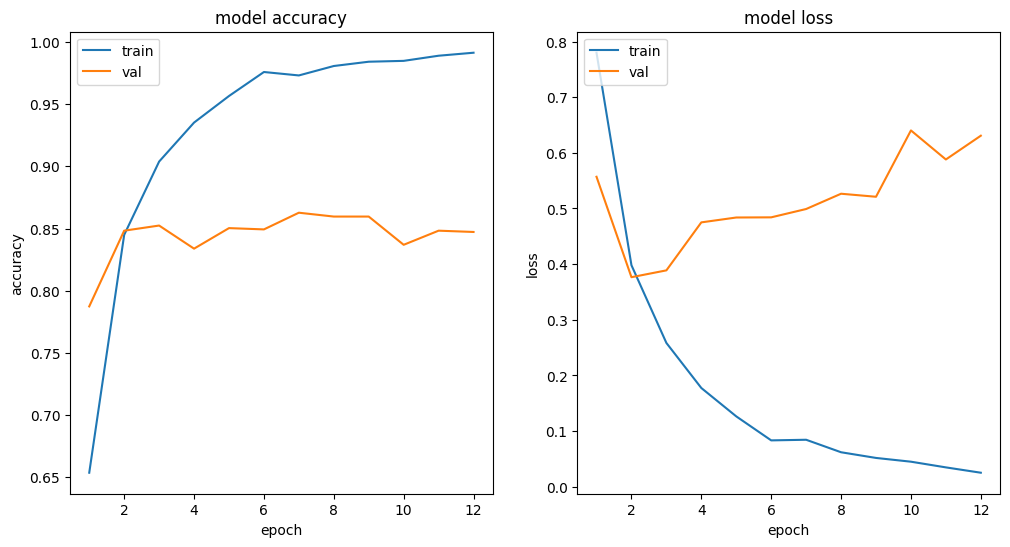

<Figure size 640x480 with 0 Axes>

In [28]:
if is_trainable:
    #compilar el modelo_lstm_no_da
    modelo_lstm_no_da = mo.compilar_modelo(modelo_lstm_no_da, **vars_compile)

    # Entrenar modelo_lstm_no_da
    modelo_lstm_no_da = mo.entrenar_modelo(modelo_lstm_no_da, X=[input_ids, attention_masks], y=y_train_no_da,
                                    validation_data=val_data_no_da, **vars_train)
    if guardar_pesos:
        #Guardar solo pesos
        mo.guardar_pesos(modelo_lstm_no_da, ruta_modelos+f'pesos_{modelo_lstm_no_da.name}.h5')
    if guardar_modelos_full:
        #Guardar modelo completo
        mo.guardar_modelo(modelo_lstm_no_da, ruta_modelos+f'{modelo_lstm_no_da.name}.h5')

Epoch 1/100


91/91 [==============================] - 241s 2s/step - loss: 0.7628 - accuracy: 0.6637 - val_loss: 0.4845 - val_accuracy: 0.8235
Epoch 2/100
91/91 [==============================] - 151s 2s/step - loss: 0.3821 - accuracy: 0.8484 - val_loss: 0.4467 - val_accuracy: 0.8122
Epoch 3/100
91/91 [==============================] - 144s 2s/step - loss: 0.2589 - accuracy: 0.9008 - val_loss: 0.3869 - val_accuracy: 0.8462
Epoch 4/100
91/91 [==============================] - 135s 1s/step - loss: 0.1908 - accuracy: 0.9304 - val_loss: 0.4453 - val_accuracy: 0.8462
Epoch 5/100
91/91 [==============================] - 141s 2s/step - loss: 0.1304 - accuracy: 0.9535 - val_loss: 0.4673 - val_accuracy: 0.8462
Epoch 6/100
91/91 [==============================] - 140s 2s/step - loss: 0.1068 - accuracy: 0.9666 - val_loss: 0.5217 - val_accuracy: 0.8390
Epoch 7/100
91/91 [==============================] - 133s 1s/step - loss: 0.0826 - accuracy: 0.9755 - val_loss: 0.5894 - val_accuracy: 0.8338
Epoch 8/100
91/91 

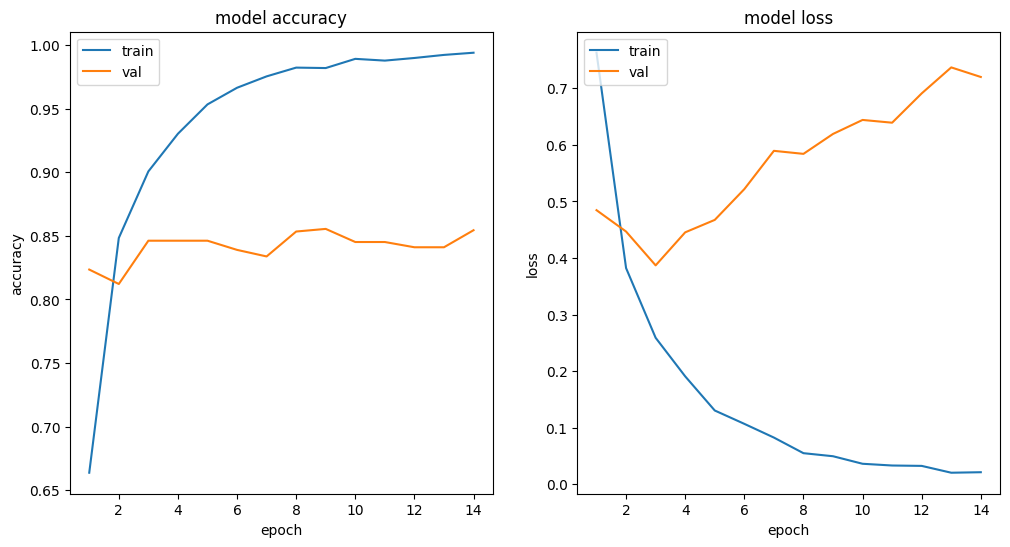

<Figure size 640x480 with 0 Axes>

In [26]:
if is_trainable:
    #compilar el modelo_bilstm_no_da
    modelo_bilstm_no_da = mo.compilar_modelo(modelo_bilstm_no_da, **vars_compile)

    # Entrenar modelo_bilstm_no_da
    modelo_bilstm_no_da = mo.entrenar_modelo(modelo_bilstm_no_da, X=[input_ids, attention_masks], y=y_train_no_da,
                                    validation_data=val_data_no_da, **vars_train)
    if guardar_pesos:
        #Guardar solo pesos
        mo.guardar_pesos(modelo_bilstm_no_da, ruta_modelos+f'pesos_{modelo_bilstm_no_da.name}.h5')
    if guardar_modelos_full:
        #Guardar modelo completo
        mo.guardar_modelo(modelo_bilstm_no_da, ruta_modelos+f'{modelo_bilstm_no_da.name}.h5')

Epoch 1/100


91/91 [==============================] - 224s 2s/step - loss: 0.7207 - accuracy: 0.6912 - val_loss: 0.4520 - val_accuracy: 0.8235
Epoch 2/100
91/91 [==============================] - 145s 2s/step - loss: 0.3428 - accuracy: 0.8635 - val_loss: 0.3848 - val_accuracy: 0.8483
Epoch 3/100
91/91 [==============================] - 141s 2s/step - loss: 0.2368 - accuracy: 0.9090 - val_loss: 0.4166 - val_accuracy: 0.8297
Epoch 4/100
91/91 [==============================] - 140s 2s/step - loss: 0.1732 - accuracy: 0.9373 - val_loss: 0.4279 - val_accuracy: 0.8411
Epoch 5/100
91/91 [==============================] - 139s 2s/step - loss: 0.1143 - accuracy: 0.9600 - val_loss: 0.4686 - val_accuracy: 0.8524
Epoch 6/100
91/91 [==============================] - 140s 2s/step - loss: 0.0845 - accuracy: 0.9704 - val_loss: 0.5143 - val_accuracy: 0.8607
Epoch 7/100
91/91 [==============================] - 140s 2s/step - loss: 0.0569 - accuracy: 0.9845 - val_loss: 0.5419 - val_accuracy: 0.8545
Epoch 8/100
91/91 

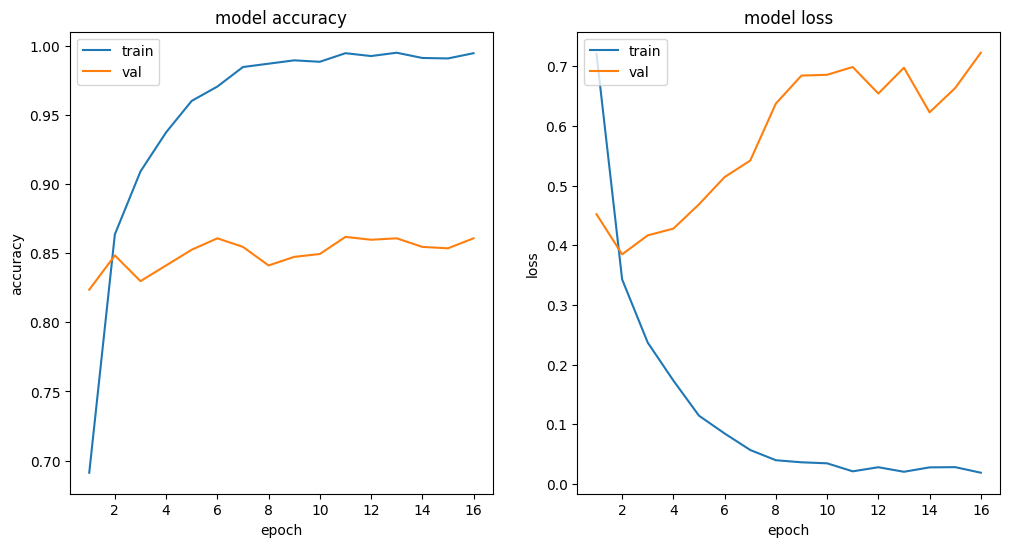

<Figure size 640x480 with 0 Axes>

In [27]:
if is_trainable:
    #compilar el modelo_gru_no_da
    modelo_gru_no_da = mo.compilar_modelo(modelo_gru_no_da, **vars_compile)

    # Entrenar modelo_gru_no_da
    modelo_gru_no_da = mo.entrenar_modelo(modelo_gru_no_da, X=[input_ids, attention_masks], y=y_train_no_da,
                                    validation_data=val_data_no_da, **vars_train)
    if guardar_pesos:
        #Guardar solo pesos
        mo.guardar_pesos(modelo_gru_no_da, ruta_modelos+f'pesos_{modelo_gru_no_da.name}.h5')
    if guardar_modelos_full:
        #Guardar modelo completo
        mo.guardar_modelo(modelo_gru_no_da, ruta_modelos+f'{modelo_gru_no_da.name}.h5')

Entrenamiento Modelos con Datos usando EDA

Epoch 1/100


197/197 [==============================] - 388s 2s/step - loss: 0.5735 - accuracy: 0.7540 - val_loss: 0.3316 - val_accuracy: 0.8757
Epoch 2/100
197/197 [==============================] - 280s 1s/step - loss: 0.2711 - accuracy: 0.9014 - val_loss: 0.2532 - val_accuracy: 0.9048
Epoch 3/100
197/197 [==============================] - 276s 1s/step - loss: 0.1777 - accuracy: 0.9389 - val_loss: 0.2451 - val_accuracy: 0.9100
Epoch 4/100
197/197 [==============================] - 274s 1s/step - loss: 0.1347 - accuracy: 0.9549 - val_loss: 0.2384 - val_accuracy: 0.9181
Epoch 5/100
197/197 [==============================] - 272s 1s/step - loss: 0.0823 - accuracy: 0.9725 - val_loss: 0.2176 - val_accuracy: 0.9319
Epoch 6/100
197/197 [==============================] - 255s 1s/step - loss: 0.0558 - accuracy: 0.9833 - val_loss: 0.2637 - val_accuracy: 0.9286
Epoch 7/100
197/197 [==============================] - 256s 1s/step - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.2954 - val_accuracy: 0.9276
Epoc

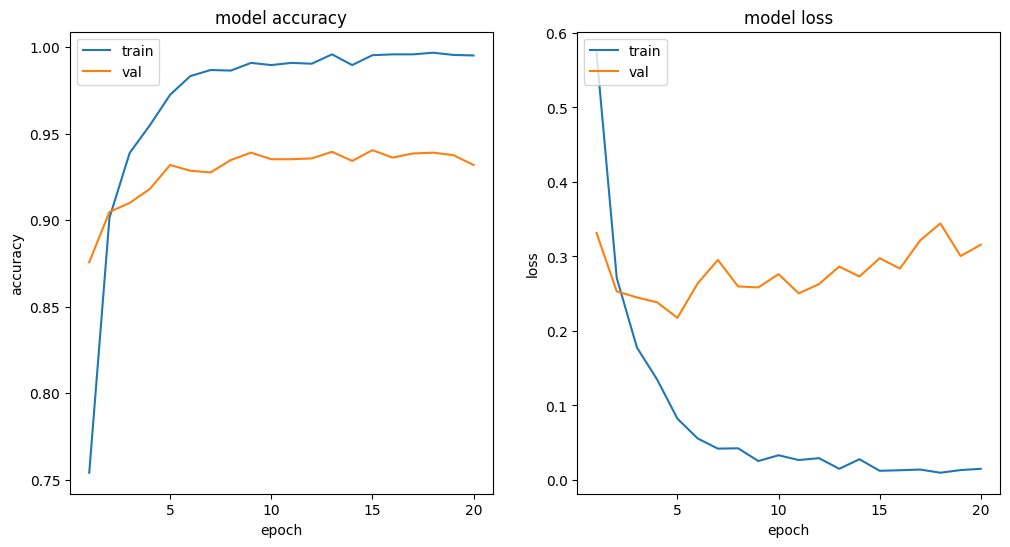

<Figure size 640x480 with 0 Axes>

In [ ]:
if is_trainable:
    #compilar el modelo_lstm_eda
    modelo_lstm_eda = mo.compilar_modelo(modelo_lstm_eda, **vars_compile)

    # Entrenar modelo_lstm_eda
    modelo_lstm_eda = mo.entrenar_modelo(modelo_lstm_eda, X=[input_ids_eda, attention_masks_eda], y=y_train_eda,
                                    validation_data=val_data_eda, **vars_train)
    if guardar_pesos:
        #Guardar solo pesos
        mo.guardar_pesos(modelo_lstm_eda, ruta_modelos+f'pesos_{modelo_lstm_eda.name}.h5')
    if guardar_modelos_full:
        #Guardar modelo completo
        mo.guardar_modelo(modelo_lstm_eda, ruta_modelos+f'{modelo_lstm_eda.name}.h5')

Epoch 1/100


197/197 [==============================] - 389s 2s/step - loss: 0.5685 - accuracy: 0.7592 - val_loss: 0.3294 - val_accuracy: 0.8733
Epoch 2/100
197/197 [==============================] - 283s 1s/step - loss: 0.2691 - accuracy: 0.9002 - val_loss: 0.2815 - val_accuracy: 0.8929
Epoch 3/100
197/197 [==============================] - 279s 1s/step - loss: 0.1761 - accuracy: 0.9375 - val_loss: 0.2664 - val_accuracy: 0.9043
Epoch 4/100
197/197 [==============================] - 277s 1s/step - loss: 0.1249 - accuracy: 0.9592 - val_loss: 0.2334 - val_accuracy: 0.9252
Epoch 5/100
197/197 [==============================] - 277s 1s/step - loss: 0.0837 - accuracy: 0.9729 - val_loss: 0.2574 - val_accuracy: 0.9305
Epoch 6/100
197/197 [==============================] - 277s 1s/step - loss: 0.0604 - accuracy: 0.9794 - val_loss: 0.2733 - val_accuracy: 0.9195
Epoch 7/100
197/197 [==============================] - 262s 1s/step - loss: 0.0539 - accuracy: 0.9825 - val_loss: 0.2850 - val_accuracy: 0.9281
Epoc

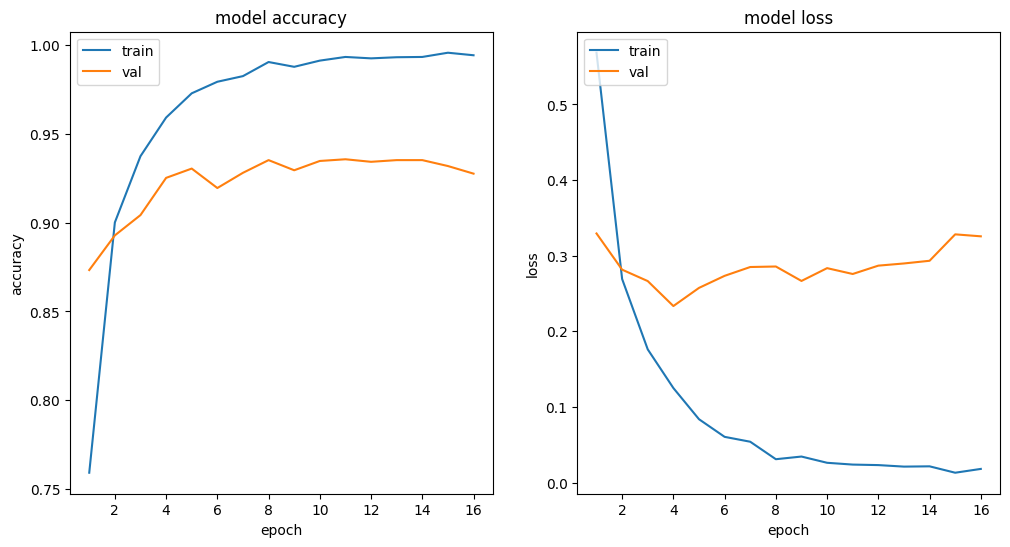

<Figure size 640x480 with 0 Axes>

In [33]:
if is_trainable:
    #compilar el modelo_bilstm_eda
    modelo_bilstm_eda = mo.compilar_modelo(modelo_bilstm_eda, **vars_compile)

    # Entrenar modelo_bilstm_eda
    modelo_bilstm_eda = mo.entrenar_modelo(modelo_bilstm_eda, X=[input_ids_eda, attention_masks_eda], y=y_train_eda,
                                    validation_data=val_data_eda, **vars_train)
    if guardar_pesos:
        #Guardar solo pesos
        mo.guardar_pesos(modelo_bilstm_eda, ruta_modelos+f'pesos_{modelo_bilstm_eda.name}.h5')
    if guardar_modelos_full:
        #Guardar modelo completo
        mo.guardar_modelo(modelo_bilstm_eda, ruta_modelos+f'{modelo_bilstm_eda.name}.h5')

Epoch 1/100


197/197 [==============================] - 347s 1s/step - loss: 0.5204 - accuracy: 0.7710 - val_loss: 0.2821 - val_accuracy: 0.8914
Epoch 2/100
197/197 [==============================] - 267s 1s/step - loss: 0.2343 - accuracy: 0.9113 - val_loss: 0.2509 - val_accuracy: 0.9062
Epoch 3/100
197/197 [==============================] - 278s 1s/step - loss: 0.1488 - accuracy: 0.9457 - val_loss: 0.2191 - val_accuracy: 0.9200
Epoch 4/100
197/197 [==============================] - 261s 1s/step - loss: 0.0979 - accuracy: 0.9667 - val_loss: 0.2298 - val_accuracy: 0.9290
Epoch 5/100
197/197 [==============================] - 277s 1s/step - loss: 0.0602 - accuracy: 0.9789 - val_loss: 0.2411 - val_accuracy: 0.9324
Epoch 6/100
197/197 [==============================] - 260s 1s/step - loss: 0.0460 - accuracy: 0.9843 - val_loss: 0.2616 - val_accuracy: 0.9262
Epoch 7/100
197/197 [==============================] - 276s 1s/step - loss: 0.0466 - accuracy: 0.9833 - val_loss: 0.2812 - val_accuracy: 0.9248
Epoc

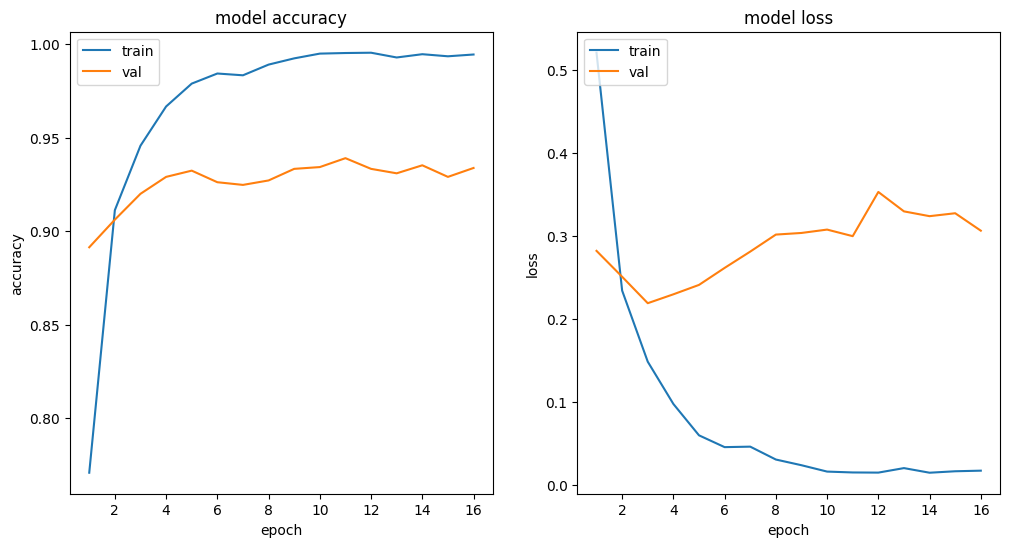

<Figure size 640x480 with 0 Axes>

In [34]:
if is_trainable:
    #compilar el modelo_gru_eda
    modelo_gru_eda = mo.compilar_modelo(modelo_gru_eda, **vars_compile)

    # Entrenar modelo_gru_eda
    modelo_gru_eda = mo.entrenar_modelo(modelo_gru_eda, X=[input_ids_eda, attention_masks_eda], y=y_train_eda,
                                    validation_data=val_data_eda, **vars_train)
    if guardar_pesos:
        #Guardar solo pesos
        mo.guardar_pesos(modelo_gru_eda, ruta_modelos+f'pesos_{modelo_gru_eda.name}.h5')
    if guardar_modelos_full:
        #Guardar modelo completo
        mo.guardar_modelo(modelo_gru_eda, ruta_modelos+f'{modelo_gru_eda.name}.h5')

Entrenamiento Modelos con Datos usando Librerias

In [ ]:
if is_trainable:
    #compilar el modelo_lstm_nlpaug
    modelo_lstm_nlpaug = mo.compilar_modelo(modelo_lstm_nlpaug, **vars_compile)

    # Entrenar modelo_lstm_nlpaug
    modelo_lstm_nlpaug = mo.entrenar_modelo(modelo_lstm_nlpaug, X=[input_ids_nlpaug, attention_masks_nlpaug], y=y_train_nlpaug,
                                            validation_data=val_data_nlpaug, **vars_train)
    if guardar_pesos:
        #Guardar solo pesos
        mo.guardar_pesos(modelo_lstm_nlpaug, ruta_modelos+f'pesos_{modelo_lstm_nlpaug.name}.h5')
    if guardar_modelos_full:
        #Guardar modelo completo
        mo.guardar_modelo(modelo_lstm_nlpaug, ruta_modelos+f'{modelo_lstm_nlpaug.name}.h5')

In [ ]:
if is_trainable:
    #compilar el modelo_bilstm_nlpaug
    modelo_bilstm_nlpaug = mo.compilar_modelo(modelo_bilstm_nlpaug, **vars_compile)

    # Entrenar modelo_bilstm_nlpaug
    modelo_bilstm_nlpaug = mo.entrenar_modelo(modelo_bilstm_nlpaug, X=[input_ids_nlpaug, attention_masks_nlpaug], y=y_train_nlpaug,
                                              validation_data=val_data_nlpaug, **vars_train)
    if guardar_pesos:
        #Guardar solo pesos
        mo.guardar_pesos(modelo_bilstm_nlpaug, ruta_modelos+f'pesos_{modelo_bilstm_nlpaug.name}.h5')
    if guardar_modelos_full:
        #Guardar modelo completo
        mo.guardar_modelo(modelo_bilstm_nlpaug, ruta_modelos+f'{modelo_bilstm_nlpaug.name}.h5')

In [ ]:
if is_trainable:
    #compilar el modelo_gru_nlpaug
    modelo_gru_nlpaug = mo.compilar_modelo(modelo_gru_nlpaug, **vars_compile)

    # Entrenar modelo_gru_nlpaug
    modelo_gru_nlpaug = mo.entrenar_modelo(modelo_gru_nlpaug, X=[input_ids_nlpaug, attention_masks_nlpaug], y=y_train_nlpaug,
                                        validation_data=val_data_nlpaug, **vars_train)
    if guardar_pesos:
        #Guardar solo pesos
        mo.guardar_pesos(modelo_gru_nlpaug, ruta_modelos+f'pesos_{modelo_gru_nlpaug.name}.h5')
    if guardar_modelos_full:
        #Guardar modelo completo
        mo.guardar_modelo(modelo_gru_nlpaug, ruta_modelos+f'{modelo_gru_nlpaug.name}.h5')

# Cargar Modelos Pre Entrenados

Cargar Modelos Completos

In [ ]:
"""
if not is_trainable:
    modelo_lstm_no_da = mo.cargar_modelo(ruta_modelos+f'{modelo_lstm_no_da.name}.h5')
    modelo_lstm_eda = mo.cargar_modelo(ruta_modelos+f'{modelo_lstm_eda.name}.h5')
    modelo_lstm_nlpaug = mo.cargar_modelo(ruta_modelos+f'{modelo_lstm_nlpaug.name}.h5')

    modelo_bilstm_no_da = mo.cargar_modelo(ruta_modelos+f'{modelo_bilstm_no_da.name}.h5')
    modelo_bilstm_eda = mo.cargar_modelo(ruta_modelos+f'{modelo_bilstm_eda.name}.h5')
    modelo_bilstm_nlpaug = mo.cargar_modelo(ruta_modelos+f'{modelo_bilstm_nlpaug.name}.h5')

    modelo_gru_no_da = mo.cargar_modelo(ruta_modelos+f'{modelo_gru_no_da.name}.h5')
    modelo_gru_eda = mo.cargar_modelo(ruta_modelos+f'{modelo_gru_eda.name}.h5')
    modelo_gru_nlpaug = mo.cargar_modelo(ruta_modelos+f'{modelo_gru_nlpaug.name}.h5')
"""

Cargar Modelos desde Json

In [52]:
if not crear_arquitectura:
    modelo_lstm_no_da = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_LSTM_no_da' + '_config.json')
    modelo_bilstm_no_da = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_BiLSTM_no_da' + '_config.json')
    modelo_gru_no_da = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_GRU_no_da' + '_config.json')

In [53]:
if not crear_arquitectura:
    modelo_lstm_eda = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_LSTM_eda' + '_config.json')
    modelo_bilstm_eda = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_BiLSTM_eda' + '_config.json')
    modelo_gru_eda = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_GRU_eda' + '_config.json')

In [ ]:
if not crear_arquitectura:
    modelo_lstm_nlpaug = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_LSTM_nlpaug' + '_config.json')
    modelo_bilstm_nlpaug = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_BiLSTM_nlpaug' + '_config.json')
    modelo_gru_nlpaug = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_GRU_nlpaug' + '_config.json')

Cargar Pesos de los Modelos

In [54]:
if not is_trainable:
    #Pesos de modelos sin DA
    modelo_lstm_no_da = mo.cargar_pesos(modelo_lstm_no_da, ruta_modelos+f'pesos_{modelo_lstm_no_da.name}.h5')
    modelo_bilstm_no_da = mo.cargar_pesos(modelo_bilstm_no_da, ruta_modelos+f'pesos_{modelo_bilstm_no_da.name}.h5')
    modelo_gru_no_da = mo.cargar_pesos(modelo_gru_no_da, ruta_modelos+f'pesos_{modelo_gru_no_da.name}.h5')

In [55]:
if not is_trainable:
    #Pesos de modelos con EDA
    modelo_lstm_eda = mo.cargar_pesos(modelo_lstm_eda, ruta_modelos+f'pesos_{modelo_lstm_eda.name}.h5')
    modelo_bilstm_eda = mo.cargar_pesos(modelo_bilstm_eda, ruta_modelos+f'pesos_{modelo_bilstm_eda.name}.h5')
    modelo_gru_eda = mo.cargar_pesos(modelo_gru_eda, ruta_modelos+f'pesos_{modelo_gru_eda.name}.h5')

In [ ]:
if not is_trainable:
    #Pesos de modelos con librerias
    modelo_lstm_nlpaug = mo.cargar_pesos(modelo_lstm_nlpaug, ruta_modelos+f'pesos_{modelo_lstm_nlpaug.name}.h5')
    modelo_bilstm_nlpaug = mo.cargar_pesos(modelo_bilstm_nlpaug, ruta_modelos+f'pesos_{modelo_bilstm_nlpaug.name}.h5')
    modelo_gru_nlpaug = mo.cargar_pesos(modelo_gru_nlpaug, ruta_modelos+f'pesos_{modelo_gru_nlpaug.name}.h5')

# Predicciones y Evaluación

In [56]:
prediction_lstm_no_da = modelo_lstm_no_da.predict(X_test_inputs_no_da)
prediction_bilstm_no_da = modelo_bilstm_no_da.predict(X_test_inputs_no_da)
prediction_gru_no_da = modelo_gru_no_da.predict(X_test_inputs_no_da)

31/31 [==============================] - 334s 11s/step


In [57]:
pred_class_lstm_no_da = np.argmax(prediction_lstm_no_da, axis=1)
pred_class_bilstm_no_da = np.argmax(prediction_bilstm_no_da, axis=1)
pred_class_gru_no_da = np.argmax(prediction_gru_no_da, axis=1)

Modelo LSTM sin DA:
              precision    recall  f1-score   support

    negative     0.8609    0.8182    0.8390       121
     neutral     0.8782    0.9026    0.8902       575
    positive     0.8175    0.7875    0.8022       273

    accuracy                         0.8596       969
   macro avg     0.8522    0.8361    0.8438       969
weighted avg     0.8589    0.8596    0.8590       969




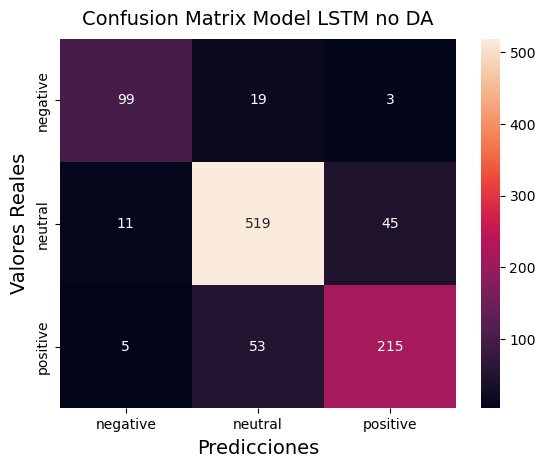

In [58]:
print('Modelo LSTM sin DA:\n'+classification_report(y_test_no_da, pred_class_lstm_no_da, target_names=cat_names, digits=4)+'\n')
cm_lstm_no_da = mo.plot_confusion_matrix(y_test_no_da, pred_class_lstm_no_da, cat_values, cat_names, "Confusion Matrix Model LSTM no DA")

Modelo BiLSTM sin DA:
              precision    recall  f1-score   support

    negative     0.8088    0.9091    0.8560       121
     neutral     0.9096    0.8748    0.8918       575
    positive     0.8107    0.8315    0.8210       273

    accuracy                         0.8669       969
   macro avg     0.8430    0.8718    0.8563       969
weighted avg     0.8691    0.8669    0.8674       969




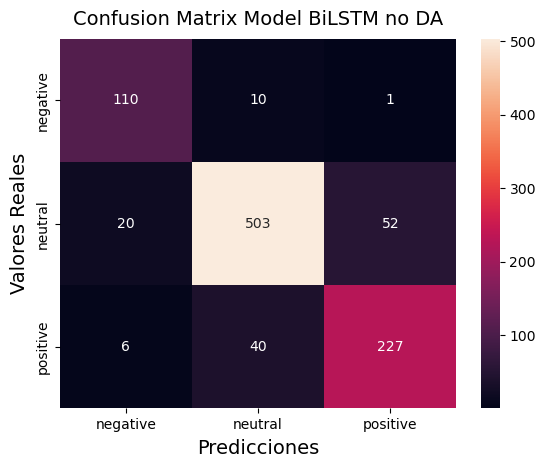

In [59]:
print('Modelo BiLSTM sin DA:\n'+classification_report(y_test_no_da, pred_class_bilstm_no_da, target_names=cat_names, digits=4)+'\n')
cm_bilstm_no_da = mo.plot_confusion_matrix(y_test_no_da, pred_class_bilstm_no_da, cat_values, cat_names, "Confusion Matrix Model BiLSTM no DA")

Modelo GRU sin DA:
              precision    recall  f1-score   support

    negative     0.8385    0.9008    0.8685       121
     neutral     0.9195    0.8539    0.8855       575
    positive     0.7705    0.8608    0.8131       273

    accuracy                         0.8617       969
   macro avg     0.8428    0.8718    0.8557       969
weighted avg     0.8674    0.8617    0.8630       969




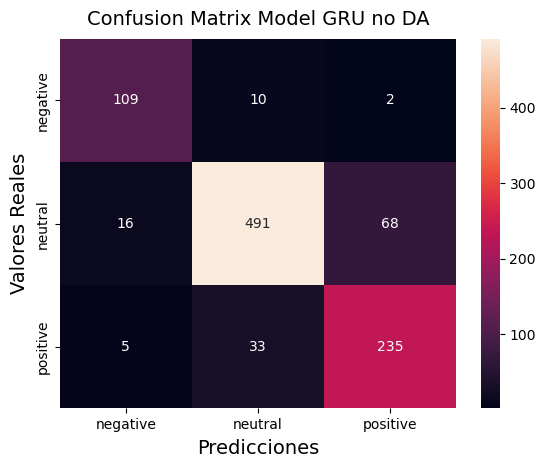

In [60]:
print('Modelo GRU sin DA:\n'+classification_report(y_test_no_da, pred_class_gru_no_da, target_names=cat_names, digits=4)+'\n')
cm_gru_no_da = mo.plot_confusion_matrix(y_test_no_da, pred_class_gru_no_da, cat_values, cat_names, "Confusion Matrix Model GRU no DA")

In [61]:
prediction_lstm_eda = modelo_lstm_eda.predict(X_test_inputs_eda)
prediction_bilstm_eda = modelo_bilstm_eda.predict(X_test_inputs_eda)
prediction_gru_eda = modelo_gru_eda.predict(X_test_inputs_eda)

66/66 [==============================] - 716s 11s/step


In [62]:
pred_class_lstm_eda = np.argmax(prediction_lstm_eda, axis=1)
pred_class_bilstm_eda = np.argmax(prediction_bilstm_eda, axis=1)
pred_class_gru_eda = np.argmax(prediction_gru_eda, axis=1)

Modelo LSTM con EDA:
              precision    recall  f1-score   support

    negative     0.9524    0.9729    0.9625       700
     neutral     0.9180    0.8957    0.9067       700
    positive     0.9145    0.9171    0.9158       700

    accuracy                         0.9286      2100
   macro avg     0.9283    0.9286    0.9284      2100
weighted avg     0.9283    0.9286    0.9284      2100




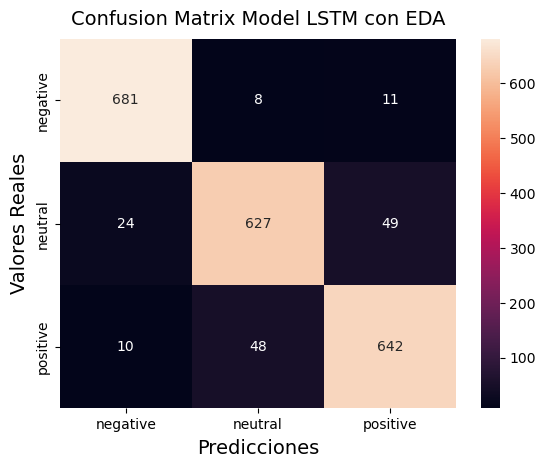

In [63]:
print('Modelo LSTM con EDA:\n'+classification_report(y_test_eda, pred_class_lstm_eda, target_names=cat_names, digits=4)+'\n')
cm_lstm_eda = mo.plot_confusion_matrix(y_test_eda, pred_class_lstm_eda, cat_values, cat_names, "Confusion Matrix Model LSTM con EDA")

Modelo BiLSTM con EDA:
              precision    recall  f1-score   support

    negative     0.9686    0.9686    0.9686       700
     neutral     0.9125    0.8943    0.9033       700
    positive     0.9048    0.9229    0.9137       700

    accuracy                         0.9286      2100
   macro avg     0.9286    0.9286    0.9285      2100
weighted avg     0.9286    0.9286    0.9285      2100




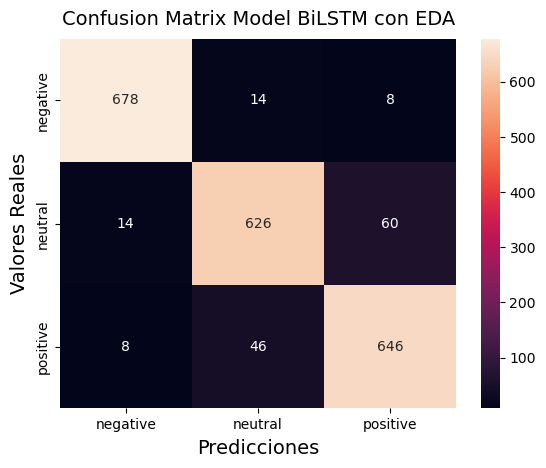

In [64]:
print('Modelo BiLSTM con EDA:\n'+classification_report(y_test_eda, pred_class_bilstm_eda, target_names=cat_names, digits=4)+'\n')
cm_bilstm_eda = mo.plot_confusion_matrix(y_test_eda, pred_class_bilstm_eda, cat_values, cat_names, "Confusion Matrix Model BiLSTM con EDA")

Modelo GRU sin DA:
              precision    recall  f1-score   support

    negative     0.9607    0.9786    0.9696       700
     neutral     0.9252    0.9014    0.9132       700
    positive     0.9191    0.9257    0.9224       700

    accuracy                         0.9352      2100
   macro avg     0.9350    0.9352    0.9351      2100
weighted avg     0.9350    0.9352    0.9351      2100




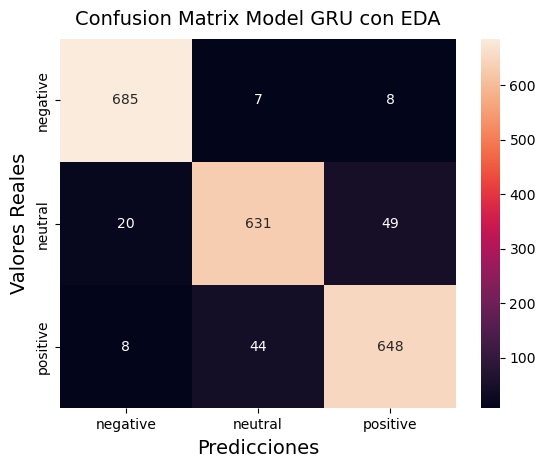

In [65]:
print('Modelo GRU sin DA:\n'+classification_report(y_test_eda, pred_class_gru_eda, target_names=cat_names, digits=4)+'\n')
cm_gru_eda = mo.plot_confusion_matrix(y_test_eda, pred_class_gru_eda, cat_values, cat_names, "Confusion Matrix Model GRU con EDA")

In [ ]:
prediction_lstm_nlpaug = modelo_lstm_nlpaug.predict(X_test_inputs_nlpaug)
prediction_bilstm_nlpaug = modelo_bilstm_nlpaug.predict(X_test_inputs_nlpaug)
prediction_gru_nlpaug = modelo_gru_nlpaug.predict(X_test_inputs_nlpaug)

In [ ]:
pred_class_lstm_nlpaug = np.argmax(prediction_lstm_nlpaug, axis=1)
pred_class_bilstm_nlpaug = np.argmax(prediction_bilstm_nlpaug, axis=1)
pred_class_gru_nlpaug = np.argmax(prediction_gru_nlpaug, axis=1)

In [ ]:
print('Modelo LSTM EDA + NLPAUG:\n'+classification_report(y_test_nlpaug, pred_class_lstm_nlpaug, target_names=cat_names, digits=4)+'\n')
cm_lstm_nlpaug = mo.plot_confusion_matrix(y_test_nlpaug, pred_class_lstm_nlpaug, cat_values, cat_names, "Confusion Matrix Model LSTM EDA + NLPAUG")

In [ ]:
print('Modelo BiLSTM EDA + NLPAUG:\n'+classification_report(y_test_nlpaug, pred_class_bilstm_nlpaug, target_names=cat_names, digits=4)+'\n')
cm_bilstm_nlpaug = mo.plot_confusion_matrix(y_test_nlpaug, pred_class_bilstm_nlpaug, cat_values, cat_names, "Confusion Matrix Model BiLSTM EDA + NLPAUG")

In [ ]:
print('Modelo GRU EDA + NLPAUG:\n'+classification_report(y_test_nlpaug, pred_class_gru_nlpaug, target_names=cat_names, digits=4)+'\n')
cm_gru_nlpaug = mo.plot_confusion_matrix(y_test_nlpaug, pred_class_gru_nlpaug, cat_values, cat_names, "Confusion Matrix Model GRU EDA + NLPAUG")

# Modelos Ensamblados

Modelos Ensamblados por Promedio

In [66]:
pred_ensemble_avg_no_da = mo.predict_avg_ensemble(prediction_lstm_no_da, prediction_bilstm_no_da, prediction_gru_no_da)
pred_class_ensemble_avg_no_da = np.argmax(pred_ensemble_avg_no_da, axis=1)

Modelo Ensamblado por Promedio sin DA:
              precision    recall  f1-score   support

    negative     0.8492    0.8843    0.8664       121
     neutral     0.9075    0.8870    0.8971       575
    positive     0.8114    0.8352    0.8231       273

    accuracy                         0.8720       969
   macro avg     0.8560    0.8688    0.8622       969
weighted avg     0.8731    0.8720    0.8724       969




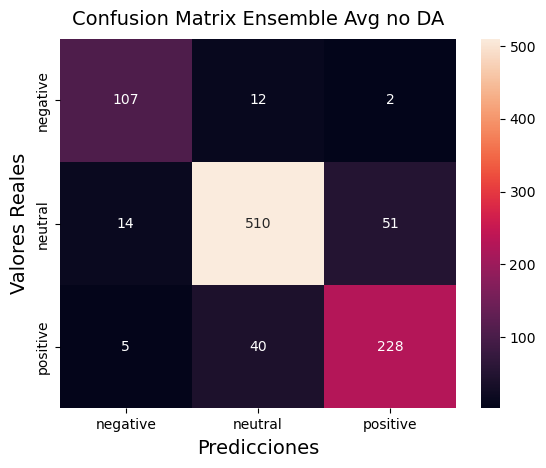

In [67]:
print('Modelo Ensamblado por Promedio sin DA:\n' + classification_report(y_test_no_da, pred_class_ensemble_avg_no_da,
                                                                         target_names=cat_names, digits=4) + '\n')
cm_ens_avg_no_da = mo.plot_confusion_matrix(y_test_no_da, pred_class_ensemble_avg_no_da, cat_values, cat_names, "Confusion Matrix Ensemble Avg no DA")

In [68]:
pred_ensemble_avg_eda = mo.predict_avg_ensemble(prediction_lstm_eda, prediction_bilstm_eda, prediction_gru_eda)
pred_class_ensemble_avg_eda = np.argmax(pred_ensemble_avg_eda, axis=1)

Modelo Ensamblado por Promedio con EDA:
              precision    recall  f1-score   support

    negative     0.9647    0.9771    0.9709       700
     neutral     0.9258    0.9086    0.9171       700
    positive     0.9190    0.9243    0.9217       700

    accuracy                         0.9367      2100
   macro avg     0.9365    0.9367    0.9365      2100
weighted avg     0.9365    0.9367    0.9365      2100




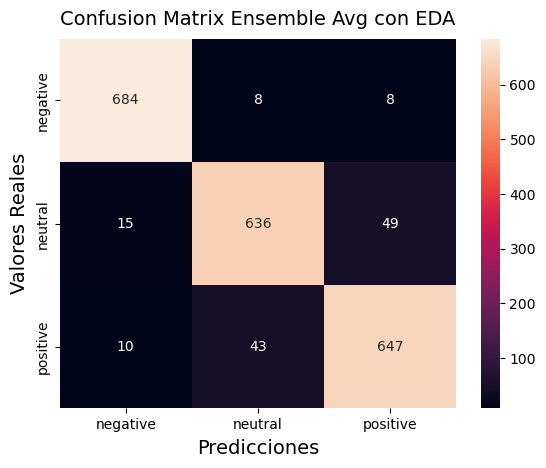

In [69]:
print('Modelo Ensamblado por Promedio con EDA:\n' + classification_report(y_test_eda, pred_class_ensemble_avg_eda,
                                                                         target_names=cat_names, digits=4) + '\n')
cm_ens_avg_eda = mo.plot_confusion_matrix(y_test_eda, pred_class_ensemble_avg_eda, cat_values, cat_names, "Confusion Matrix Ensemble Avg con EDA")

In [ ]:
pred_ensemble_avg_nlpaug = mo.predict_avg_ensemble(prediction_lstm_nlpaug, prediction_bilstm_nlpaug, prediction_gru_nlpaug)
pred_class_ensemble_avg_nlpaug = np.argmax(pred_ensemble_avg_nlpaug, axis=1)

In [ ]:
print('Modelo Ensamblado por Promedio EDA + NLPAUG:\n' + classification_report(y_test_nlpaug, pred_class_ensemble_avg_nlpaug,
                                                                         target_names=cat_names, digits=4) + '\n')
cm_ens_avg_nlpaug = mo.plot_confusion_matrix(y_test_nlpaug, pred_class_ensemble_avg_nlpaug, cat_values, cat_names, "Confusion Matrix Ensemble Avg EDA + NLPAUG")

Modelos Ensamblados por Votación

In [70]:
pred_class_ensemble_vote_no_da = mo.predict_vote_ensemble(prediction_lstm_no_da, prediction_bilstm_no_da, prediction_gru_no_da)

Modelo Ensamblado por Promedio sin DA:
              precision    recall  f1-score   support

    negative     0.8413    0.8760    0.8583       121
     neutral     0.9037    0.8817    0.8926       575
    positive     0.8050    0.8315    0.8180       273

    accuracy                         0.8669       969
   macro avg     0.8500    0.8631    0.8563       969
weighted avg     0.8681    0.8669    0.8673       969




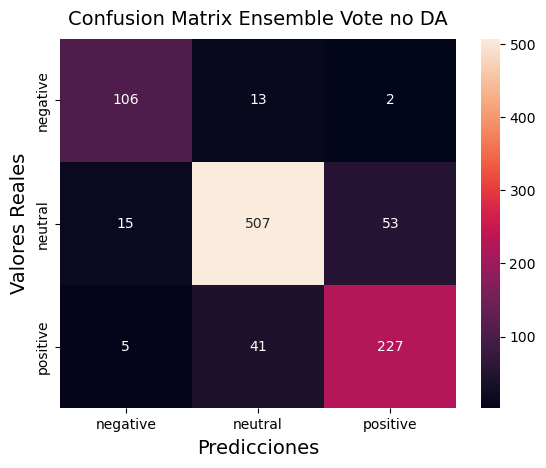

In [71]:
print('Modelo Ensamblado por Votación sin DA:\n' + classification_report(y_test_no_da, pred_class_ensemble_vote_no_da,
                                                                         target_names=cat_names, digits=4) + '\n')
cm_ens_vote_no_da = mo.plot_confusion_matrix(y_test_no_da, pred_class_ensemble_vote_no_da, cat_values, cat_names, "Confusion Matrix Ensemble Vote no DA")

In [72]:
pred_class_ensemble_vote_eda = mo.predict_vote_ensemble(prediction_lstm_eda, prediction_bilstm_eda, prediction_gru_eda)

Modelo Ensamblado por Promedio con EDA:
              precision    recall  f1-score   support

    negative     0.9634    0.9786    0.9709       700
     neutral     0.9242    0.9057    0.9149       700
    positive     0.9203    0.9243    0.9223       700

    accuracy                         0.9362      2100
   macro avg     0.9360    0.9362    0.9360      2100
weighted avg     0.9360    0.9362    0.9360      2100




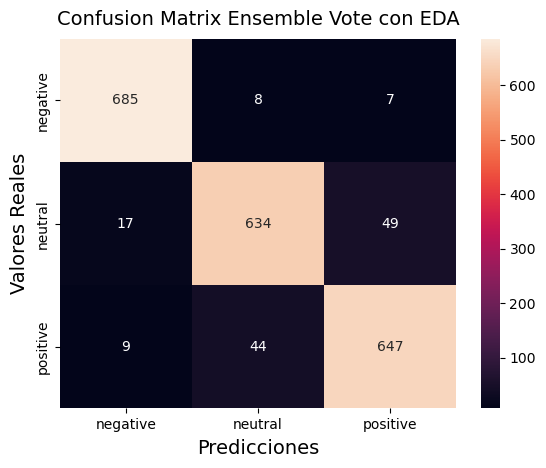

In [73]:
print('Modelo Ensamblado por Votación con EDA:\n' + classification_report(y_test_eda, pred_class_ensemble_vote_eda,
                                                                         target_names=cat_names, digits=4) + '\n')
cm_ens_vote_eda = mo.plot_confusion_matrix(y_test_eda, pred_class_ensemble_vote_eda, cat_values, cat_names, "Confusion Matrix Ensemble Vote con EDA")

In [ ]:
pred_class_ensemble_vote_nlpaug = mo.predict_vote_ensemble(prediction_lstm_nlpaug, prediction_bilstm_nlpaug, prediction_gru_nlpaug)

In [ ]:
print('Modelo Ensamblado por Votación EDA + NLPAUG:\n' + classification_report(y_test_nlpaug, pred_class_ensemble_vote_nlpaug,
                                                                         target_names=cat_names, digits=4) + '\n')
cm_ens_vote_nlpaug = mo.plot_confusion_matrix(y_test_nlpaug, pred_class_ensemble_vote_nlpaug, cat_values, cat_names, "Confusion Matrix Ensemble Vote EDA + NLPAUG")

# Reporte

In [75]:
#métricas para modelos hibridos sin DA
acc_lstm_no_da = accuracy_score(y_test_no_da, pred_class_lstm_no_da)
acc_bilstm_no_da = accuracy_score(y_test_no_da, pred_class_bilstm_no_da)
acc_gru_no_da = accuracy_score(y_test_no_da, pred_class_gru_no_da)
prec_lstm_no_da = precision_score(y_test_no_da, pred_class_lstm_no_da, average='weighted')
prec_bilstm_no_da = precision_score(y_test_no_da, pred_class_bilstm_no_da, average='weighted')
prec_gru_no_da = precision_score(y_test_no_da, pred_class_gru_no_da, average='weighted')
rec_lstm_no_da = recall_score(y_test_no_da, pred_class_lstm_no_da, average='weighted')
rec_bilstm_no_da = recall_score(y_test_no_da, pred_class_bilstm_no_da, average='weighted')
rec_gru_no_da = recall_score(y_test_no_da, pred_class_gru_no_da, average='weighted')
f1_lstm_no_da = f1_score(y_test_no_da, pred_class_lstm_no_da, average='weighted')
f1_bilstm_no_da = f1_score(y_test_no_da, pred_class_bilstm_no_da, average='weighted')
f1_gru_no_da = f1_score(y_test_no_da, pred_class_gru_no_da, average='weighted')

In [76]:
#métricas para modelos hibridos con EDA
acc_lstm_eda = accuracy_score(y_test_eda, pred_class_lstm_eda)
acc_bilstm_eda = accuracy_score(y_test_eda, pred_class_bilstm_eda)
acc_gru_eda = accuracy_score(y_test_eda, pred_class_gru_eda)
prec_lstm_eda = precision_score(y_test_eda, pred_class_lstm_eda, average='weighted')
prec_bilstm_eda = precision_score(y_test_eda, pred_class_bilstm_eda, average='weighted')
prec_gru_eda = precision_score(y_test_eda, pred_class_gru_eda, average='weighted')
rec_lstm_eda = recall_score(y_test_eda, pred_class_lstm_eda, average='weighted')
rec_bilstm_eda = recall_score(y_test_eda, pred_class_bilstm_eda, average='weighted')
rec_gru_eda = recall_score(y_test_eda, pred_class_gru_eda, average='weighted')
f1_lstm_eda = f1_score(y_test_eda, pred_class_lstm_eda, average='weighted')
f1_bilstm_eda = f1_score(y_test_eda, pred_class_bilstm_eda, average='weighted')
f1_gru_eda = f1_score(y_test_eda, pred_class_gru_eda, average='weighted')

In [ ]:
#métricas para modelos hibridos con EDA + NLPAUG
acc_lstm_nlpaug = accuracy_score(y_test_nlpaug, pred_class_lstm_nlpaug)
acc_bilstm_nlpaug = accuracy_score(y_test_nlpaug, pred_class_bilstm_nlpaug)
acc_gru_nlpaug = accuracy_score(y_test_nlpaug, pred_class_gru_nlpaug)
prec_lstm_nlpaug = precision_score(y_test_nlpaug, pred_class_lstm_nlpaug, average='weighted')
prec_bilstm_nlpaug = precision_score(y_test_nlpaug, pred_class_bilstm_nlpaug, average='weighted')
prec_gru_nlpaug = precision_score(y_test_nlpaug, pred_class_gru_nlpaug, average='weighted')
rec_lstm_nlpaug = recall_score(y_test_nlpaug, pred_class_lstm_nlpaug, average='weighted')
rec_bilstm_nlpaug = recall_score(y_test_nlpaug, pred_class_bilstm_nlpaug, average='weighted')
rec_gru_nlpaug = recall_score(y_test_nlpaug, pred_class_gru_nlpaug, average='weighted')
f1_lstm_nlpaug = f1_score(y_test_nlpaug, pred_class_lstm_nlpaug, average='weighted')
f1_bilstm_nlpaug = f1_score(y_test_nlpaug, pred_class_bilstm_nlpaug, average='weighted')
f1_gru_nlpaug = f1_score(y_test_nlpaug, pred_class_gru_nlpaug, average='weighted')


In [77]:
#métricas para modelos ensamblados sin DA
acc_avg_no_da = accuracy_score(y_test_no_da, pred_class_ensemble_avg_no_da)
acc_vote_no_da = accuracy_score(y_test_no_da, pred_class_ensemble_vote_no_da)
prec_avg_no_da = precision_score(y_test_no_da, pred_class_ensemble_avg_no_da, average='weighted')
prec_vote_no_da = precision_score(y_test_no_da, pred_class_ensemble_vote_no_da, average='weighted')
rec_avg_no_da = recall_score(y_test_no_da, pred_class_ensemble_avg_no_da, average='weighted')
rec_vote_no_da = recall_score(y_test_no_da, pred_class_ensemble_vote_no_da, average='weighted')
f1_avg_no_da = f1_score(y_test_no_da, pred_class_ensemble_avg_no_da, average='weighted')
f1_vote_no_da = f1_score(y_test_no_da, pred_class_ensemble_vote_no_da, average='weighted')

In [78]:
#métricas para modelos ensamblados con EDA
acc_avg_eda = accuracy_score(y_test_eda, pred_class_ensemble_avg_eda)
acc_vote_eda = accuracy_score(y_test_eda, pred_class_ensemble_vote_eda)
prec_avg_eda = precision_score(y_test_eda, pred_class_ensemble_avg_eda, average='weighted')
prec_vote_eda = precision_score(y_test_eda, pred_class_ensemble_vote_eda, average='weighted')
rec_avg_eda = recall_score(y_test_eda, pred_class_ensemble_avg_eda, average='weighted')
rec_vote_eda = recall_score(y_test_eda, pred_class_ensemble_vote_eda, average='weighted')
f1_avg_eda = f1_score(y_test_eda, pred_class_ensemble_avg_eda, average='weighted')
f1_vote_eda = f1_score(y_test_eda, pred_class_ensemble_vote_eda, average='weighted')

In [ ]:
#métricas para modelos ensamblados con EDA + NLPAUG
acc_avg_nlpaug = accuracy_score(y_test_nlpaug, pred_class_ensemble_avg_nlpaug)
acc_vote_nlpaug = accuracy_score(y_test_nlpaug, pred_class_ensemble_vote_nlpaug)
prec_avg_nlpaug = precision_score(y_test_nlpaug, pred_class_ensemble_avg_nlpaug, average='weighted')
prec_vote_nlpaug = precision_score(y_test_nlpaug, pred_class_ensemble_vote_nlpaug, average='weighted')
rec_avg_nlpaug = recall_score(y_test_nlpaug, pred_class_ensemble_avg_nlpaug, average='weighted')
rec_vote_nlpaug = recall_score(y_test_nlpaug, pred_class_ensemble_vote_nlpaug, average='weighted')
f1_avg_nlpaug = f1_score(y_test_nlpaug, pred_class_ensemble_avg_nlpaug, average='weighted')
f1_vote_nlpaug = f1_score(y_test_nlpaug, pred_class_ensemble_vote_nlpaug, average='weighted')

In [79]:
metrics_values = [
    [acc_lstm_no_da, prec_lstm_no_da, rec_lstm_no_da, f1_lstm_no_da], #lstm no da
    [acc_bilstm_no_da, prec_bilstm_no_da, rec_bilstm_no_da, f1_bilstm_no_da], #bilstm no da
    [acc_gru_no_da, prec_gru_no_da, rec_gru_no_da, f1_gru_no_da], #gru no da
    [acc_lstm_eda, prec_lstm_eda, rec_lstm_eda, f1_lstm_eda], #lstm eda
    [acc_bilstm_eda, prec_bilstm_eda, rec_bilstm_eda, f1_bilstm_eda], #bilstm eda
    [acc_gru_eda, prec_gru_eda, rec_gru_eda, f1_gru_eda], #gru eda
    [acc_lstm_nlpaug, prec_lstm_nlpaug, rec_lstm_nlpaug, f1_lstm_nlpaug], #lstm nlpaug
    [acc_bilstm_nlpaug, prec_bilstm_nlpaug, rec_bilstm_nlpaug, f1_bilstm_nlpaug], #bilstm nlpaug
    [acc_gru_nlpaug, prec_gru_nlpaug, rec_gru_nlpaug, f1_gru_nlpaug], #gru nlpaug
    [acc_avg_no_da, prec_avg_no_da, rec_avg_no_da, f1_avg_no_da], #avg no da
    [acc_vote_no_da, prec_vote_no_da, rec_vote_no_da, f1_vote_no_da], #vote no da
    [acc_avg_eda, prec_avg_eda, rec_avg_eda, f1_avg_eda], #avg eda
    [acc_vote_eda, prec_vote_eda, rec_vote_eda, f1_vote_eda], #vote eda
    [acc_avg_nlpaug, prec_avg_nlpaug, rec_avg_nlpaug, f1_avg_nlpaug], #avg nlpaug
    [acc_vote_nlpaug, prec_vote_nlpaug, rec_vote_nlpaug, f1_vote_nlpaug] #vote nlpaug
]

In [80]:
metrics_columns = ['Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score']
metrics_rows = ['RoBERTa-LSTM no DA', 'RoBERTa-BiLSTM no DA', 'RoBERTa-GRU no DA',
                'RoBERTa-LSTM con EDA', 'RoBERTa-BiLSTM con EDA', 'RoBERTa-GRU con EDA',
                'RoBERTa-LSTM EDA + NLPAUG', 'RoBERTa-BiLSTM EDA + NLPAUG', 'RoBERTa-GRU EDA + NLPAUG',
                'Avg Ensemble no DA', 'Vote Ensemble no DA',
                'Avg Ensemble con EDA', 'Vote Ensemble con EDA',
                'Avg Ensemble EDA + NLPAUG', 'Vote Ensemble EDA + NLPAUG']

In [81]:
df_metrics = pd.DataFrame(metrics_values, index=metrics_rows, columns=metrics_columns)
df_metrics

,Accuracy Score,Precision Score,Recall Score,F1 Score
RoBERTa-LSTM no DA,0.859649,0.858916,0.859649,0.859036
RoBERTa-BiLSTM no DA,0.866873,0.869147,0.866873,0.867406
RoBERTa-GRU no DA,0.861713,0.867386,0.861713,0.862986
RoBERTa-LSTM con EDA,0.928571,0.928329,0.928571,0.928368
RoBERTa-BiLSTM con EDA,0.928571,0.928623,0.928571,0.928537
RoBERTa-GRU con EDA,0.935238,0.935033,0.935238,0.935053
RoBERTa-LSTM con NLPAUG,NaN,NaN,NaN,NaN
RoBERTa-BiLSTM con NLPAUG,NaN,NaN,NaN,NaN
RoBERTa-GRU con NLPAUG,NaN,NaN,NaN,NaN
Avg Ensemble no DA,0.872033,0.873127,0.872033,0.872418


In [88]:
df_metrics.to_excel(ruta_modelos+'DF_Metricas.xlsx', header=True, index=True)

Comparar Matrices de Confusión

In [82]:
titulos1 = ['RoBERTa-LSTM no DA', 'RoBERTa-BiLSTM no DA', 'RoBERTa-GRU no DA', 
            'RoBERTa-LSTM con EDA', 'RoBERTa-BiLSTM con EDA', 'RoBERTa-GRU con EDA']
titulos2 = ['Avg Ensemble no DA', 'Vote Ensemble no DA',
            'Avg Ensemble con EDA', 'Vote Ensemble con EDA']

In [83]:
lista_cm1 = [cm_lstm_no_da, cm_bilstm_no_da, cm_gru_no_da,
             cm_lstm_eda, cm_bilstm_eda, cm_gru_eda]
lista_cm2 = [cm_ens_avg_no_da, cm_ens_vote_no_da, 
             cm_ens_avg_eda, cm_ens_vote_eda]

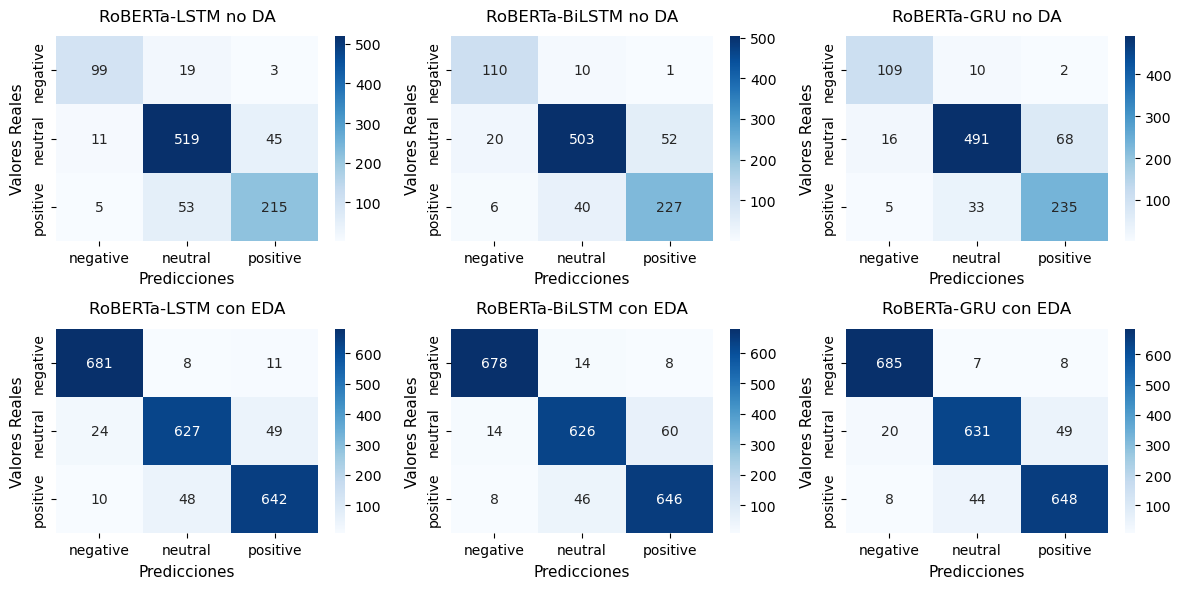

In [84]:
mo.subplotear_cm(lista_cm1, titulos1, cat_names, n_rows=2, n_cols=3)

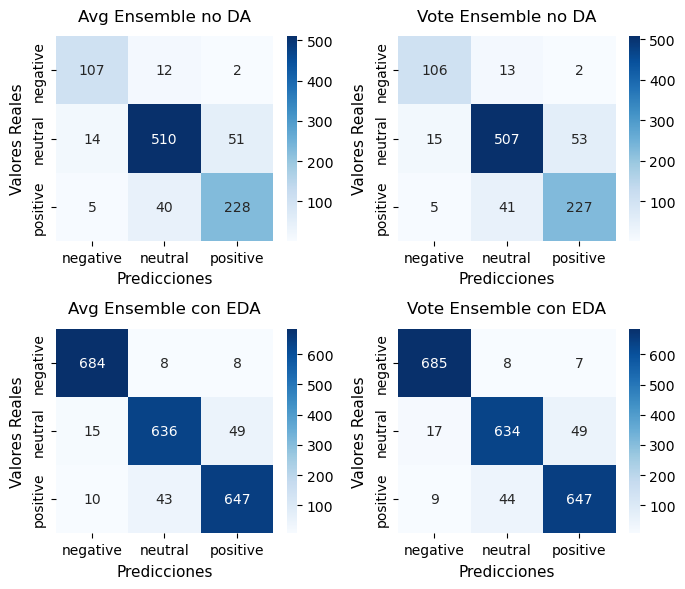

In [85]:
mo.subplotear_cm(lista_cm2, titulos2, cat_names, n_rows=2, n_cols=2)

In [23]:
modelo_lstm_eda = mo.cargar_modelo_json(ruta_modelos + 'Model_RoBERTa_LSTM_eda' + '_config.json')
modelo_lstm_eda = mo.cargar_pesos(modelo_lstm_eda, ruta_modelos+f'pesos_{modelo_lstm_eda.name}.h5')

In [26]:
json_file = 'https://drive.google.com/uc?id=1-4PF9ZHWPWoXP0mj2TNoIf5MrgINIzjw'
modelo_lstm_prueba = mo.cargar_modelo_json(json_file)

OSError: [Errno 22] Invalid argument: 'https://drive.google.com/uc?id=1-4PF9ZHWPWoXP0mj2TNoIf5MrgINIzjw'

In [ ]:
prediction_lstm_no_da = modelo_lstm_no_da.predict(X_test_inputs_no_da)
pred_class_lstm_no_da = np.argmax(prediction_lstm_no_da, axis=1)

In [ ]:
prediction

array([[5.41691861e-07, 9.99999404e-01, 4.60210847e-09],
       [7.27189354e-06, 9.99990940e-01, 1.83085024e-06],
       [6.76099007e-05, 9.99357402e-01, 5.74893551e-04],
       ...,
       [2.39685905e-05, 9.99955177e-01, 2.09147111e-05],
       [3.05483321e-04, 8.79131138e-01, 1.20563395e-01],
       [6.07698267e-11, 1.41759660e-11, 1.00000000e+00]], dtype=float32)

In [ ]:
y_predicted_df=np.argmax(prediction, axis=1)
y_predicted_df

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 0,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1,
       0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2,
       2, 1, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 2, 1, 1,
       1, 0, 1, 2, 2, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 2, 1, 0, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2,

In [ ]:
df_test=pd.DataFrame(y_test_df)
df_test.columns=[0,1,2]
etiquetas_combinadas = df_test.idxmax(axis=1)

In [ ]:
print(classification_report(etiquetas_combinadas,y_predicted_df))

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       118
           1       0.88      0.84      0.86       563
           2       0.72      0.80      0.76       287

    accuracy                           0.82       968
   macro avg       0.80      0.80      0.80       968
weighted avg       0.82      0.82      0.82       968



Modelo ensamblado por Promedio

In [ ]:
#Prediccion ensamblada por promedio para datos sin DA
pred_ensemble_avg_no_da = [(pred1 + pred2 + pred3) / n_cat
                           for pred1, pred2, pred3
                           in zip(prediction_lstm_no_da, prediction_bilstm_no_da, prediction_gru_no_da)]
pred_class_ensemble_avg_no_da = np.argmax(pred_ensemble_avg_no_da, axis=1)

In [ ]:
print('Modelo Ensamblado por Promedio sin DA:\n' + classification_report(y_test_no_da, pred_class_ensemble_avg_no_da) + '\n')

Modelo Ensamblado por Promedio sin DA:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       121
           1       0.89      0.92      0.90       575
           2       0.85      0.80      0.83       273

    accuracy                           0.88       969
   macro avg       0.87      0.86      0.86       969
weighted avg       0.88      0.88      0.88       969




In [ ]:
#Prediccion ensamblada por promedio para datos con EDA
ensemble_pred_avg_eda = [(pred1 + pred2 + pred3) / n_cat
                         for pred1, pred2, pred3 in zip(prediction_lstm_eda, prediction_bilstm_eda, prediction_gru_eda)]

In [ ]:
#Prediccion ensamblada por promedio para datos con nlpaug
ensemble_pred_avg_nlpaug = [(pred1 + pred2 + pred3) / n_cat
                            for pred1, pred2, pred3 in zip(prediction_lstm_nlpaug, prediction_bilstm_nlpaug, prediction_gru_nlpaug)]

Modelo ensamblado por voto mayoritario

In [ ]:
predictions = zip(list(prediction_lstm_no_da), list(prediction_bilstm_no_da), list(prediction_gru_no_da))
type(predictions)

zip

In [ ]:
ensemble_pred_vote_no_da = [max(set(tuple(pred) for pred in predictions), key=predictions.count)
                            for predictions in zip(prediction_lstm_no_da, prediction_bilstm_no_da, prediction_gru_no_da)]

ValueError: ignored

In [ ]:
ensemble_pred_vote_eda = [max(set(predictions), key=predictions.count)
                          for predictions in zip(prediction_lstm_eda, prediction_bilstm_eda, prediction_gru_eda)]

In [ ]:
ensemble_pred_vote_nlpaug = [max(set(predictions), key=predictions.count)
                             for predictions in zip(prediction_lstm_nlpaug, prediction_bilstm_nlpaug, prediction_gru_nlpaug)]

In [154]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plotear_confusion_matrix(y_true, y_pred, cat_values, cat_names, title:str='Matriz de Confusión'):
    cm = confusion_matrix(y_true, y_pred, labels=cat_values)
    ax = sns.heatmap(cm, fmt="d", annot=True, xticklabels=cat_names, yticklabels=cat_names)
    ax.set_xlabel('Predicciones', fontsize=14, labelpad=5)
    ax.set_ylabel('Valores Reales', fontsize=14, labelpad=5)
    ax.set_title(title, fontsize=14, pad=10)
    plt.show()
    return cm

In [251]:
#4, 7, 10
def plotear_confusion_matrix2(lista_cm, lista_titulos,cat_names, n_rows=2, n_cols=2):
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(7 + 5*(n_cols-2), 3 * n_rows))

    for cm, title, ax in zip(lista_cm, lista_titulos, axes.flatten()):
        sns.heatmap(cm, fmt="d", annot=True, xticklabels=cat_names, yticklabels=cat_names, ax=ax, cmap='Blues')
        ax.set_xlabel('Predicciones', fontsize=11, labelpad=5)
        ax.set_ylabel('Valores Reales', fontsize=11, labelpad=5)
        ax.set_title(title, fontsize=12, pad=11)
    plt.tight_layout()  
    plt.show()